# 데이터 전처리

In [1]:
#모듈 추가
import pandas as pd
print("pandas version: ", pd.__version__)
pd.set_option('display.max_row', 1000)
pd.set_option('display.max_columns', 1000)
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import re
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import warnings
import rise
warnings.filterwarnings(action='ignore')

# 팔레트

#기본
palette1 = sns.color_palette('pastel')

#범주형
categorical = sns.color_palette('Set3', 10)

#연속형1
sbys = sns.color_palette('RdBu', 10)

#연속형2
sequential = sns.color_palette("GnBu", 10)


# 폰트
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

pandas version:  1.2.4


#### 데이터 불러오기

In [3]:
#데이터 확인

jejurent_df = pd.read_excel("./jeju_Rev5.xlsx")
jejurent_df

,Car_name,Car_type,Capacity,Fuel_type,EnterP,Age,InsuranceType,Review,Resevation,Star,Date,요일,rentcar_company_count,연식,에어백,후방센서,후방카메라,블랙박스,4륜구동,금연차량,스팀소독,네비게이션,스마트키,열선시트,열선핸들,통풍시트,썬루프,블루투스,낚시용품허용,Month,Car_price,Price
0,BMW 530D(경),수입,5,경유,알프스렌트카,26,완전자차,0,7,0.0,2021-06-01,화,1,2019~20,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,6,85000000,279600
1,벤츠 E220D 카브리올레(경),수입,5,경유,예스렌트카,26,완전자차,2,20,3.1,2021-06-01,화,1,2019~20,1,1,1,0,0,1,1,1,1,1,0,0,0,1,0,6,80300000,472000
2,제네시스 G90(휘),고급,5,휘발유,제주OK렌트카,26,부분무제한,0,7,0.0,2021-06-01,화,2,2019~20,1,1,1,0,0,1,0,1,1,1,1,1,0,1,0,6,79070000,320500
3,BMW 430i 컨버터블(휘),수입,4,휘발유,제주다움렌트카,26,완전자차,1,27,5.0,2021-06-01,화,3,2020~21,1,1,1,1,0,1,0,1,1,1,0,0,0,1,0,6,76500000,378900
4,테슬라모델3 퍼포먼스 EV(전기/충전비유료),수입,5,전기차,퍼시픽렌트카,26,슈퍼무제한,1,17,4.3,2021-06-01,화,1,2020~21,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,6,74790000,378000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21144,테슬라모델3 EV(전기/충전비유료),수입,5,전기차,퍼스트렌트카,26,완전자차,8,233,3.7,2021-10-30,토,1,2020~21,1,1,1,0,0,1,0,1,1,1,1,0,0,1,0,10,54790000,446100
21145,볼보 S90 (휘),수입,5,휘발유,퍼스트렌트카,26,완전자차,0,9,0.0,2021-10-30,토,1,2021~22,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,10,59490000,446100
21146,BMW 430i 컨버터블(휘),수입,4,휘발유,퍼스트렌트카,26,완전자차,3,24,4.8,2021-10-30,토,1,2020~21,1,1,1,1,0,1,0,1,1,1,1,1,0,1,0,10,76500000,531000
21147,BMW Z4 컨버터블 (휘),수입,2,휘발유,퍼스트렌트카,26,완전자차,1,5,4.6,2021-10-30,토,1,2021~22,1,1,1,1,0,1,0,1,1,1,0,0,0,1,0,10,66400000,531000


---

## 3. 데이터 전처리

### 독립변수 가공

#### 추가 독립변수 1 : "평일/휴일"
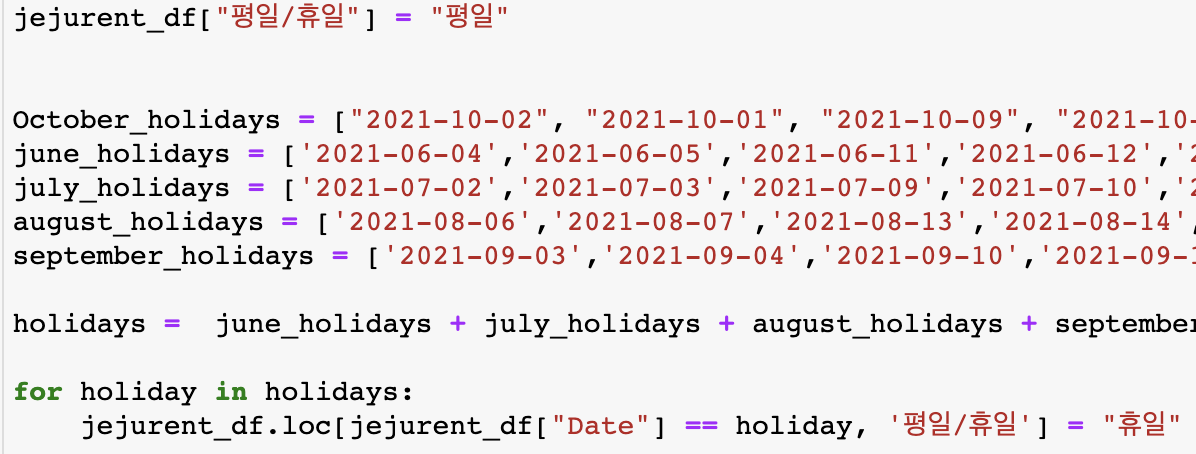
- 평일과 휴일을 여행수요가 증가할 것으로 예상되는 요일과 날짜를 기준으로 나누었다.
    - 월,화,수,목,일 : 평일
    - 금,토 & 공휴일 & 공휴일과 주말 사이의 평일 : 휴일
    






#### 추가 독립변수 2 : "성수기/비성수기"
##### 월별 가격 변동 그래프


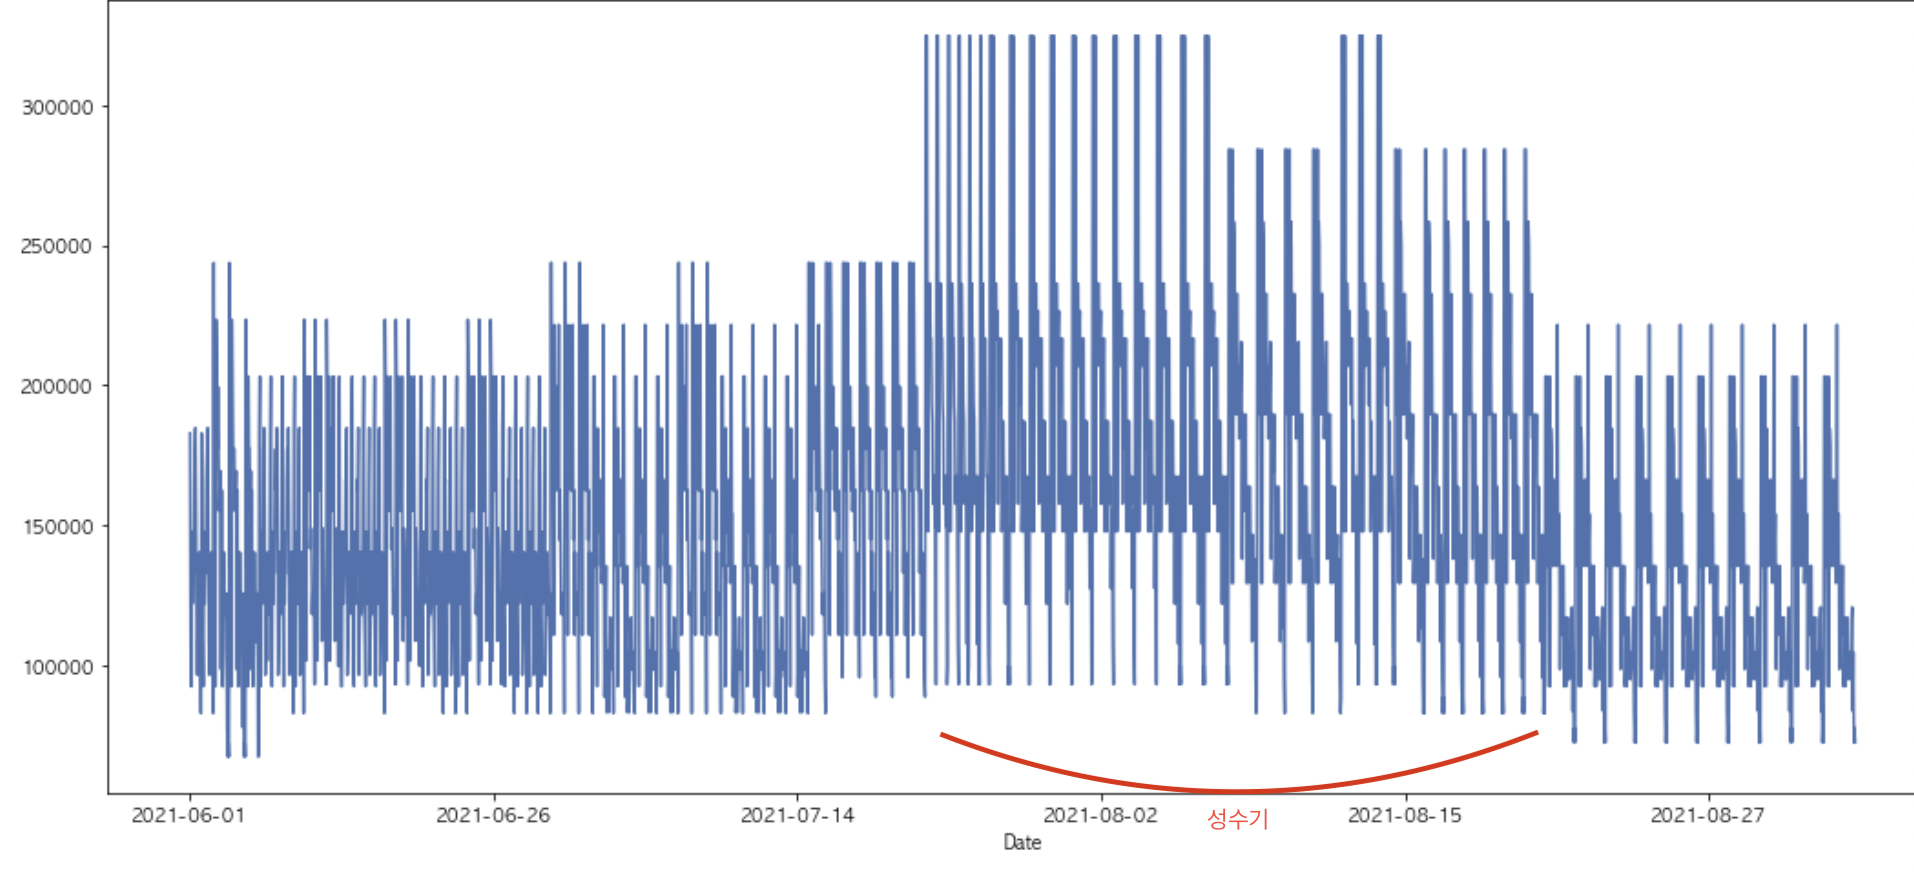

- 차종마다 상이하지만 평균적으로 가격이 가장 높은 7월 15일부터 35일간 성수기로 정했다.

#### 수정한 독립변수 1 : "옵션개수"
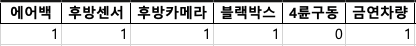
- 옵션의 유무로 1,0 으로 표현을 했지만 독립변수가 너무 많아진다.
- 해당 변수들을 다 지우고 "옵션개수" 변수를 추가해서 대체한다.

#### 수정한 독립변수 2 : "연식"
- 크롤링 과정에서 값이 "2019~20연식"의 문자열로 저장됨.
- Regression을 위해 수치형 데이터로 변경 : "2019~20연식" -> "2019"

In [4]:
#평일/휴일 컬럼 추가
# 추가 이유 : 평일과 휴일(주말, 공휴일)에 따라 렌트카의 가격프리미엄이 붙는다.
jejurent_df["평일/휴일"] = "평일"


October_holidays = ["2021-10-02", "2021-10-01", "2021-10-09", "2021-10-08", "2021-10-15", "2021-10-16", "2021-10-22", "2021-10-23", "2021-10-29", "2021-10-30"]
june_holidays = ['2021-06-04','2021-06-05','2021-06-11','2021-06-12','2021-06-18','2021-06-19','2021-06-25','2021-06-26']
july_holidays = ['2021-07-02','2021-07-03','2021-07-09','2021-07-10','2021-07-16','2021-07-17','2021-07-23','2021-07-24','2021-07-30','2021-07-31']
august_holidays = ['2021-08-06','2021-08-07','2021-08-13','2021-08-14','2021-08-20','2021-08-21','2021-08-27','2021-08-28']
september_holidays = ['2021-09-03','2021-09-04','2021-09-10','2021-09-11','2021-09-17','2021-09-18','2021-09-19','2021-09-20','2021-09-21','2021-09-22','2021-09-23','2021-09-24','2021-09-25']

holidays =  june_holidays + july_holidays + august_holidays + september_holidays + October_holidays

for holiday in holidays:
    jejurent_df.loc[jejurent_df["Date"] == holiday, '평일/휴일'] = "휴일"
    

    
    
# 성수기 라벨링(07-15~08-18) 

import datetime
import time

vac_season = []
times = datetime.date(2021, 7, 15)
for i in range(35):
    vac_season.append(times.strftime('%Y-%m-%d'))
    times += datetime.timedelta(days=1)
    
jejurent_df["성수기/비성수기"] = 0

for day in vac_season:
    jejurent_df.loc[jejurent_df["Date"] == day, '성수기/비성수기'] = 1

    
    
# 옵션 카운트컬럼 적용 및 옵션 컬럼 삭제
for i in range(15,29):
    jejurent_df[jejurent_df.columns[14]] += jejurent_df[jejurent_df.columns[i]]
jejurent_df.drop(columns=jejurent_df.columns[15:29], axis=1, inplace=True)
jejurent_df.rename(columns={"에어백":"옵션개수"}, inplace=True)    
    
    
    

#연식 컬럼 수정 (2020~21 -> 2020)
car_age_ls = []
for car_age in list(jejurent_df["연식"]):
    car_age_ls.append(car_age[0:4])

jejurent_df["연식"] = car_age_ls

In [5]:
# 전처리한 데이터셋
jejurent_df

,Car_name,Car_type,Capacity,Fuel_type,EnterP,Age,InsuranceType,Review,Resevation,Star,Date,요일,rentcar_company_count,연식,옵션개수,Month,Car_price,Price,평일/휴일,성수기/비성수기
0,BMW 530D(경),수입,5,경유,알프스렌트카,26,완전자차,0,7,0.0,2021-06-01,화,1,2019,13,6,85000000,279600,평일,0
1,벤츠 E220D 카브리올레(경),수입,5,경유,예스렌트카,26,완전자차,2,20,3.1,2021-06-01,화,1,2019,9,6,80300000,472000,평일,0
2,제네시스 G90(휘),고급,5,휘발유,제주OK렌트카,26,부분무제한,0,7,0.0,2021-06-01,화,2,2019,10,6,79070000,320500,평일,0
3,BMW 430i 컨버터블(휘),수입,4,휘발유,제주다움렌트카,26,완전자차,1,27,5.0,2021-06-01,화,3,2020,9,6,76500000,378900,평일,0
4,테슬라모델3 퍼포먼스 EV(전기/충전비유료),수입,5,전기차,퍼시픽렌트카,26,슈퍼무제한,1,17,4.3,2021-06-01,화,1,2020,11,6,74790000,378000,평일,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21144,테슬라모델3 EV(전기/충전비유료),수입,5,전기차,퍼스트렌트카,26,완전자차,8,233,3.7,2021-10-30,토,1,2020,9,10,54790000,446100,휴일,0
21145,볼보 S90 (휘),수입,5,휘발유,퍼스트렌트카,26,완전자차,0,9,0.0,2021-10-30,토,1,2021,13,10,59490000,446100,휴일,0
21146,BMW 430i 컨버터블(휘),수입,4,휘발유,퍼스트렌트카,26,완전자차,3,24,4.8,2021-10-30,토,1,2020,11,10,76500000,531000,휴일,0
21147,BMW Z4 컨버터블 (휘),수입,2,휘발유,퍼스트렌트카,26,완전자차,1,5,4.6,2021-10-30,토,1,2021,9,10,66400000,531000,휴일,0


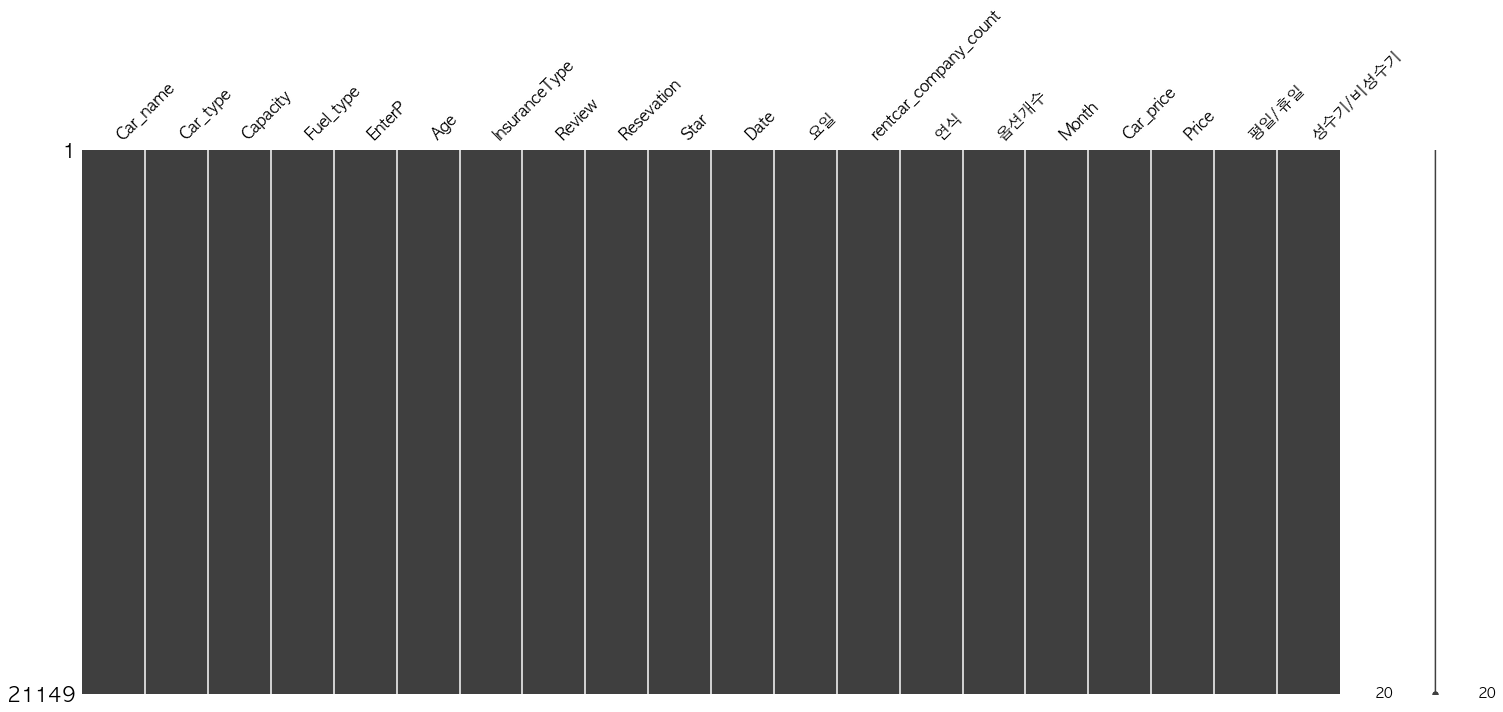

In [6]:
# 데이터셋 결측치 확인
import missingno as msno
msno.matrix(jejurent_df)
plt.show()

---